## The Sparks Foundation - Data Science & Business        Analytics
##  Task1:-Prediction using Supervised ML
###  A Linear Regression task to predict the percentage of        a student based on the number of study hours per day
### Dataset url: http://bit.ly/w-data



##  Author: Ashwin Kumar


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics


### step 1: reading and exploring the data set

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [4]:
df.shape

(25, 2)

In [5]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### step 2: data visulization

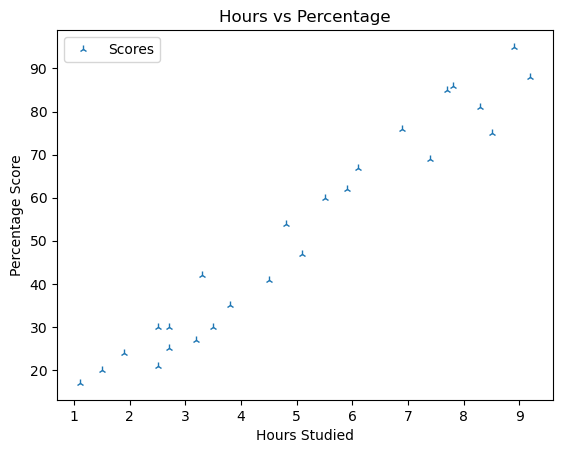

In [8]:
df.plot(x="Hours",y="Scores",style="2")
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

### Step 3: Split Data

In [9]:
x = df.iloc[:,:-1].values  
y = df.iloc[:,1].values

In [10]:
#split the dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=0)

In [11]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

### Step 4: Plotting the line of regression

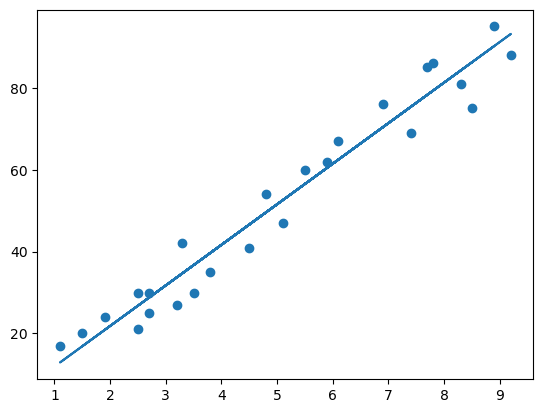

In [12]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

### Step 5: Making Predictions

In [13]:
# testing data
print(x_test)
# model prediction
y_pred = regressor.predict(x_test)


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Step 6:Comparing Actual result to predicted value

In [14]:
#comparing the actual score vs predicted score
df = pd.DataFrame({"Actual Score":y_test,"Predicted Score":y_pred})
df

,Actual Score,Predicted Score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [15]:
# predicted score if student studies for 9.25 hrs
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
predction = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(predction[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### Step 6:Evaluating the model

#### The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.


In [16]:
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(y_test,y_pred))

Mean absolute error: 4.18


In [17]:
print("Residual sum of squares (MSF): %.2f" % np.mean((y_test - y_pred) ** 2))

Residual sum of squares (MSF): 21.60


In [18]:
print("R2-Score: %.2f" % metrics.r2_score(y_test,y_pred))

R2-Score: 0.95


# Making predictive system 

In [19]:
# saving the trained model


In [20]:
import pickle

In [21]:
filename = 'trained_model.sav'
pickle.dump(regressor,open(filename,'wb'))

In [22]:
#loading the saved model

In [24]:
loaded_model = pickle.load(open('C:/Users/ashwi/OneDrive/Documents/GitHub/TSF-GRIP/trained_model.sav','rb'))

In [25]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
predction = loaded_model.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(predction[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538
